In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler

In [180]:
import pandas as pd
data = pd.read_csv('/content/Tata-steel.csv')

In [181]:
data = data[['Close Price']]

In [182]:
data = data.dropna()
data

,Close Price
0,300.95
1,298.75
2,297.45
3,283.40
4,280.55
...,...
1480,1184.05
1481,1172.45
1482,1166.85
1483,1163.35


In [183]:
train_size = int(0.8*data.shape[0])
print(train_size)

1188


In [184]:
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size+1:]

In [185]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data


array([[0.17117814],
       [0.1673971 ],
       [0.16516284],
       ...,
       [0.11858726],
       [0.11420469],
       [0.12090745]])

In [186]:
X_train = []
Y_train = []
for i in range (50, train_data.shape[0]):
    X_train.append(train_data[i-50: i]) 
    Y_train.append(train_data[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [187]:
#BUILDING THE LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 

model = Sequential()
model.add(LSTM(units=60, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 1))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(LSTM(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 1))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 


model.add(LSTM(units=100, activation= "tanh"))
model.add(Dropout(0.3)) 
model.add(Dense(units = 1))

In [188]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 50, 60)            14880     
                                                                 
 dropout_27 (Dropout)        (None, 50, 60)            0         
                                                                 
 lstm_28 (LSTM)              (None, 50, 70)            36680     
                                                                 
 dropout_28 (Dropout)        (None, 50, 70)            0         
                                                                 
 lstm_29 (LSTM)              (None, 100)               68400     
                                                                 
 dropout_29 (Dropout)        (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 1)               

In [189]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [190]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 32)


Epoch 1/10
36/36 [==============================] - 5s 13ms/step - loss: 0.0389
Epoch 2/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 3/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 4/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 5/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 6/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 7/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 8/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 9/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 10/10
36/36 [==============================] - 0s 12ms/step - loss: 0.0038


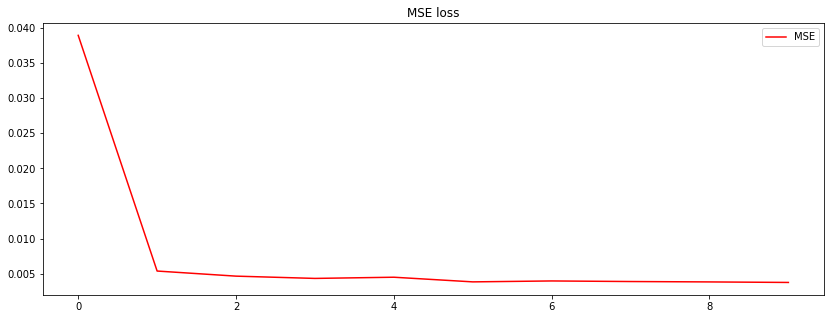

In [191]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'MSE')

plt.title('MSE loss')

plt.legend()
plt.show()

In [192]:
inputs = scaler.transform(test_data)


In [193]:
X_test = []
y_test = []

for i in range (50, inputs.shape[0]):
  X_test.append (inputs[i-50:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [194]:
y_pred= model.predict (X_test)

In [161]:
y_test.shape

(246,)

In [195]:
scaler.scale_

array([0.00171866])

In [196]:
scale = 0.00171866
scale

0.00171866

In [197]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

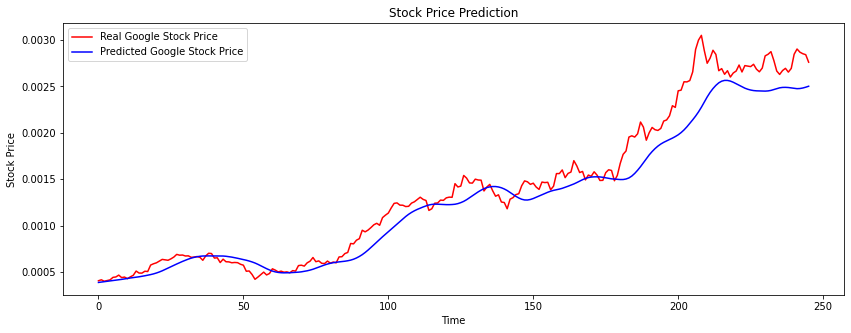

In [199]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()